# Decking layout

Decking boards are 5/4x6, or 1"x5.5".  Spacing will be set below as gap: either 1/8 or 3/16"


In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [10, 10]

gap=0.1875  # or 0.125 .   Spacing between decking 
b2=5.5  # 
b1=1.0  #
j2=7.5
j1=1.5
hstep=7.    # height of step
lip=1.0     # lip
totalHeight=56.0



In [3]:
def makeBoard(xs,ys,dx,dy,color):
    xe=xs+dx; ye=ys+dy
    plt.plot(np.array([xs,xe,xe,xs,xs]),np.array([ys,ys,ye,ye,ys]),color)
def makeBoardEnds(xs,ys,xe,ye,color):    
    plt.plot(np.array([xs,xe,xe,xs,xs]),np.array([ys,ys,ye,ye,ys]),color)
def makeFilledBoard(xs,ys,dx,dy,color):
    xe=xs+dx; ye=ys+dy
    x=np.array([xs,xs,xe,xe])
    y1=np.array([ys,ys,ys,ye])
    y2=np.array([ys,ye,ye,ye])
    plt.fill_between(x,y1,y2=y2,facecolor=color)
def makeComplex(x,y,color):
    plt.plot(x,y,color)

## Lip Step

('tread=', 10.375, 'inches.  Must be at least 10 inches')


(-1.078125, 22.640625, -14.75, 8.96875)

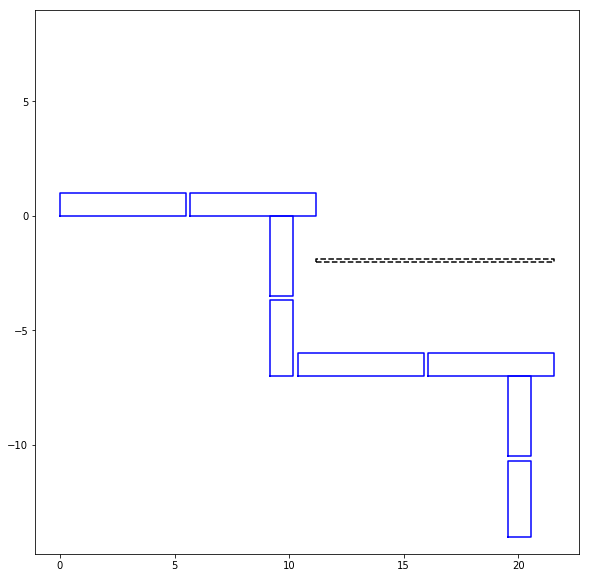

In [4]:
makeBoard(0,0,b2,b1,'b')
makeBoard(b2+gap,0,b2,b1,'b')
makeBoard(2*b2+gap-lip-b1,-3.5,b1,3.5,'b')
makeBoard(2*b2+gap-lip-b1,-hstep,b1,(hstep-3.5-gap),'b')
makeBoard(2*b2+2*gap-lip,-hstep,b2,b1,'b')
makeBoard(3*b2+3*gap-lip,-hstep,b2,b1,'b')
makeBoard(4*b2+3*gap-2*lip-b1,-hstep-3.5,b1,3.5,'b')
makeBoard(4*b2+3*gap-2*lip-b1,-2*hstep,b1,(hstep-3.5-gap),'b')

tread=(4*b2+3*gap-lip)-(2*b2+gap)
makeBoard(2*b2+gap,-2,tread,0.1,'k--')
print("tread=",tread,"inches.  Must be at least 10 inches")

#makeBoard(2*hboard+gap-lip-wboard-j1-.05,-hstep,j1,hstep,'r')
plt.axis('square')

## Paneling faces

(1, 'inch first,', 9, 'full boards, and', 3.625, 'inch last')


(25.865625, 87.46562499999999, -2.8000000000000003, 58.8)

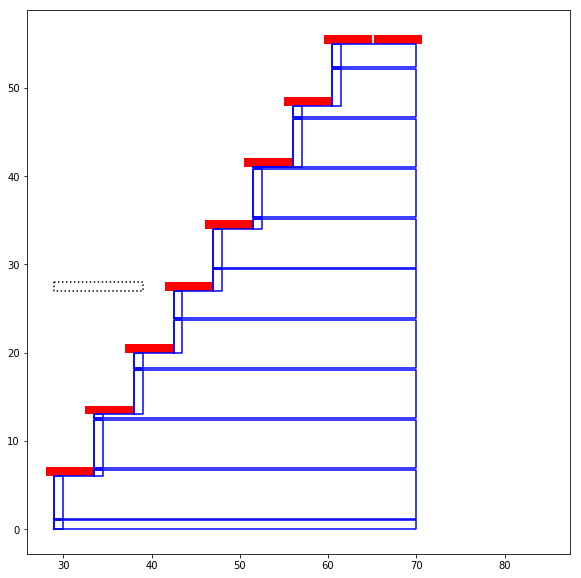

In [5]:
#2.6
hfirst=1   # height of first board from ground.  >=0, <=5.5

h=hfirst+gap
Nfull=0
while h+b2<totalHeight-b1:
    h=h+b2+gap
    Nfull=Nfull+1
hlast=totalHeight-h
print(hfirst,"inch first,",Nfull,"full boards, and",hlast,"inch last")

facewidth=totalHeight

#makeBoard(0.75*facewidth,0,-b1,hfirst,'b')
#top=hfirst+gap
#for i in range(Nfull):
#    makeBoard(0,top,facewidth,b2,'b')
##    makeBoard(0.75*facewidth,top,-b1,b2,'b')
#    top=top+gap+b2
#makeBoard(0,top,facewidth,hlast,'b')
#makeBoard(0.75*facewidth,top,-b1,hlast,'b')

for i in range(8):
    xst=0.5*facewidth+i*b2-i*lip
    makeFilledBoard(xst,(i+1)*hstep-b1,b2,b1,'red')
    #makeFilledBoard(xst+b2+gap,(i+1)*hstep-b1,b2,b1,'red')
makeFilledBoard(xst+b2+gap,(i+1)*hstep-b1,b2,b1,'red')
    
rend=70
xst=0.5*facewidth+lip; xend=xst-lip+b2
makeBoard(xst,0,b1,hfirst,'b')
makeBoardEnds(xst,0,rend,hfirst,'b')
top=hfirst+gap
step=1
makeBoard(xst,4*hstep,10,-b1,'k:')

for i in range(Nfull):  #Nfull
    if top+b2>step*hstep-b1:
        pt1=step*hstep-b1   # bottom of the step
        pt3=top+b2
        pt2=step*hstep      # top of step or top of board
        if(pt3<pt2):    # new board doesn't go over top
            pt2=pt3
        makeComplex(np.array([xst,xst,xend,xend,rend,rend,xst]),
                    np.array([top,pt1,pt1,pt3,pt3,top,top]),'b')
        makeBoardEnds(xst,top,xst+b1,pt1,'b')
        makeBoardEnds(xend,pt1,xend+b1,pt3,'b')
        xst=xst+b2-lip; xend=xend+b2-lip
        step=step+1
    else:
        makeBoardEnds(xst,top,rend,top+b2,'b')
        makeBoardEnds(xst,top,xst+b1,top+b2,'b')
    top=top+b2+gap
        
makeBoardEnds(xst,top,rend,step*hstep-b1,'b')  
makeBoardEnds(xst,top,xst+b1,step*hstep-b1,'b')
#    makeBoard(0,top,facewidth,b2,'b')
#    top=top+gap+b2
#makeBoard(0,top,facewidth,hlast,'b')
#makeBoard(0.75*facewidth,top,-b1,hlast,'b')
    
plt.axis('square')

In [6]:
56./5.5


10.181818181818182

## Lip Step